<a href="https://colab.research.google.com/github/gorselli14/Portifolio_Projetos/blob/master/An%C3%A1lise_dos_dados_do_Airbnb_(Londres).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exercício do Curso de Data Science**
by [Gabriel Orselli](https://www.linkedin.com/in/gabriel-veras-orselli-5a005824)

---
#Analise dos dados do Airbnb - Londres
O [Airbnb](https://www.airbnb.com) é considera a *maior empresa hoteleira da atualizade*, mesmo sem possuir um único hotel!

A plataforma surgiu da ideia de conectar pessoas que querem viajar , com pessoas que querem alugar imóveis. O Airbnb então criou uma plataforma inovadora que traz a praticidade para fazer isso acontecer.

No final de 2018, o Airbnb já havia **hospedado mais de 300 milhões** de pessoas por todo o mundo. Se tornando uma pedra no sapato das redes hoteleiras.

Uma das iniciativas do Airbnb é disponibilizar dados, através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), para contribuir com projetos de *Data Science*.

Optei por realizar a análise dos dados do Airbnb de Londres, por considerar esse um dos lugares mais incríveis que tive o prazer de conhecer.

Uma cidade muito organizada, segura, com muitas opções de entretenimento para todos os gostos. Lodres é um lugar que merece ser visitado e espero que essa análise ajude outras pessoas à realizar o sonho de conhecer Londres.

Além da análise sobre a hospedagem, segue um link com pontos turísticos que precisam estar no seu roteiro: [Mapa de Londres.org](https://mapadelondres.org/pontos-turisticos-de-londres/)

## Obtenção dos dados para análise

Todos os dados usados nesse projeto foram obtidos a partir do portar [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para essa análise utilizarei o seguinte arquivo:
* `listing.csv` - *Summary information and metrics for listings in London (good for visualisations).*

In [29]:
#importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [30]:
# importando arquivo listing.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-05-10/visualisations/listings.csv")

## Análise dos dados

Essa etapa tem o objetivo de fazer uma análise inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


In [31]:
#mostrar as primeiras 5 entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,3,361
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.70,1,256
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.38,15,330
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,360
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,35,2020-03-30,0.69,1,42


### **Q1. Quantos atributos e quantas entradas existem nesse conjunto de dados? Quais os tipos de variáveis?**

Vou analisar a quantidade de entradas existentes no conjuntos de dados e identificar os tipos das variáveis em cada coluna.

O *dataset* utilizado nessa análise é a versão resumida. Existem outros arquivos mais completos dentro do portal do Airbnb, porém os dados analisados fornecerão informação suficiente para tomada de decisão sobre local de hospedagem com preço adequado à cada orçamento de viagem.

In [32]:
# identificar o volume de dados do DataFrame
print(f'Qtd de linhas:\t {df.shape[0]}')
print(f'Qtd de colunas:\t {df.shape[1]}\n')

#verificar os tipos de variáveis em cada coluna
display(df.dtypes)

Qtd de linhas:	 85207
Qtd de colunas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual o percentual de valores ausentes no *dataset*?**

A qualidade de um *dataset* está relacionada à quantidade de valores ausentes e é importante logo no início idenficar se esses valores nulos são significativos dentro do total de entradas.

* É possível identificar que a coluna `neighbourhood_group` possui 100% dos valores auzentes.
* As variáveis `reviews_per_month` e `last_review` estão com 25% dos valores nulos
* As variáveis `host_name` e `name` estão com percentual de valores nulos inferior a 0,1%


In [33]:
# identificar o percentual de valores ausentes e ordená-los em ordem decrescente
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  25.159905
last_review                        25.159905
host_name                           0.032861
name                                0.028167
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, o modelo de histograma abaixo garante uma identificação visual de como os dados estão distribuidos dentro de cada agrupamento de informações.
Para essa primeira análise visual, estamos utilizando os dados sem realizar nenhum tipo de tratamento.

Histograma com Outliers


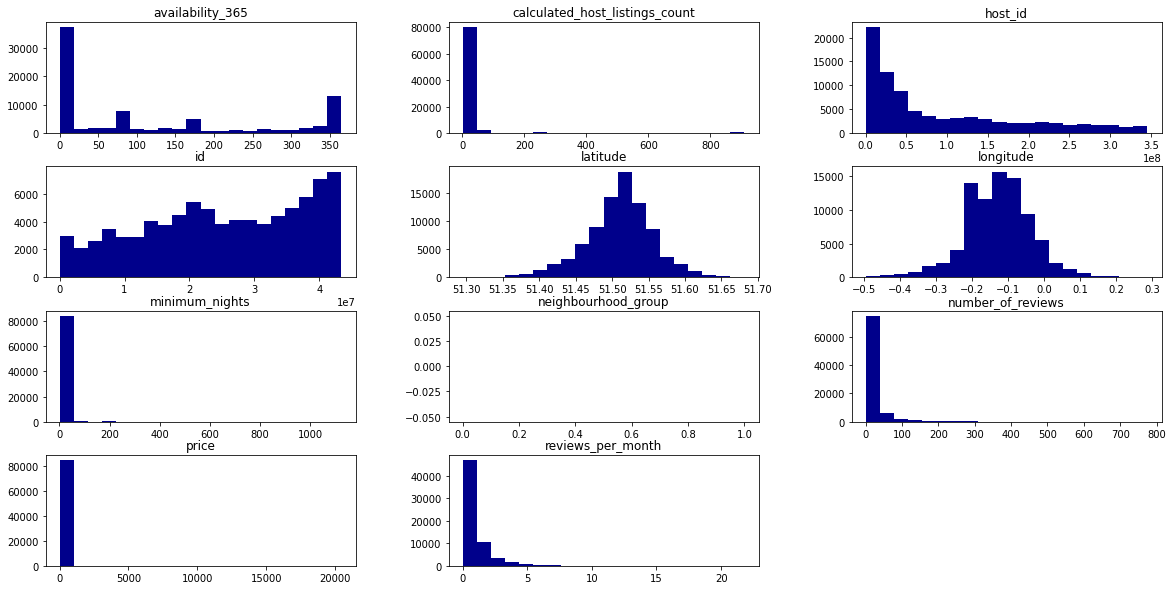

In [34]:
# plotar o histograma de variáveis numéricas sem exclusão dos possíveis Outliers
print('Histograma com Outliers')
df.hist(bins=20, figsize=(20,10), color='darkblue', grid=False);

### **Q4. Existem *outliers* presentes nesse *dataset*?***

Se analisarmos o histograma gerado para as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`, podemos identificar indícios da presença de *outliers*.

Nessas variáveis existem valores que não seguem uma distribuição e distorcem toda a representação gráfica.

Existem duas maneiras para confirmar e identificar os *outliers*. São elas:
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável


In [35]:
# Resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,85207.000000,85207.000000,85207.000000,63769.000000,85207.000000,85207.000000
mean,128.951800,4.593437,17.284179,0.877056,20.224477,122.478975
std,306.939736,19.667718,37.170766,1.090839,98.070548,139.290122
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,46.000000,1.000000,0.000000,0.180000,1.000000,0.000000
50%,81.000000,2.000000,4.000000,0.500000,1.000000,74.000000
75%,140.000000,3.000000,17.000000,1.150000,5.000000,251.000000
max,20471.000000,1125.000000,775.000000,21.810000,910.000000,365.000000


Analisando o resumo estatístico acima, podemos identificar alguns *outliers*:
* A variável `price` possui 75% dos valores abaixo de £140, porém o maior valor dessa variável é  £20.471;
* O maior valor da variável `minimum_nights`, que representa o número mínimo de noites que o anfitrião aceita alugar o imóvel, é igual a 1125 dias;
* O maior valor da variável `calculated_host_listings_count`, que representa a quantidade de imóveis de um mesmo anfitrião é igual a 910.

#### Boxplot para a variável `minimum_nights`

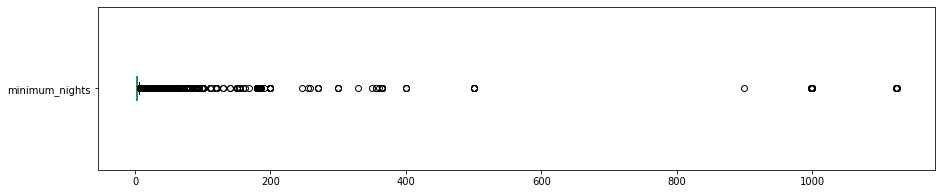

Valores acima de 30 dias:
1039 entradas
Que representa 1.2194%


In [36]:
# Boxplot minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));
plt.show()
# Valores acima de 30 dias para minimum_nights
print('Valores acima de 30 dias:')
print(f'{len(df[df.minimum_nights>30])} entradas')
print(f'Que representa {(len(df [df.minimum_nights > 30])/df.shape[0])*100:.4f}%')

#### Boxplot para a variável `price`

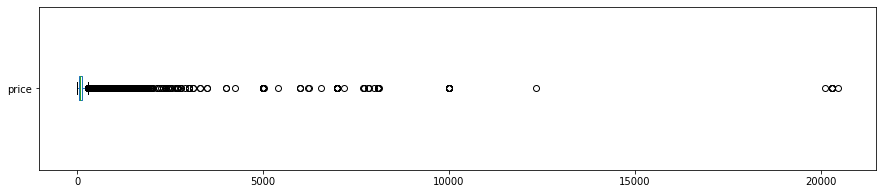

Valor acima de £500
2041 entradas
Que representa 2.3953%


In [37]:
#Boxplot price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
print('Valor acima de £500')
print(f'{len(df[df.price>500])} entradas')
print(f'Que representa {(len(df[df.price>500])/df.shape[0])*100:.4f}%')

#### Histograma sem os *outliers* identificados

Uma vez identificados os *outliers* nas variaveis `price`e `minimum_nights`, vamos retirar esses valores do *dataframe* e plotar novamente o histograma, para que seja possível ter uma melhor visualização da distribuição dos valores dentro do agrupamento de informações.

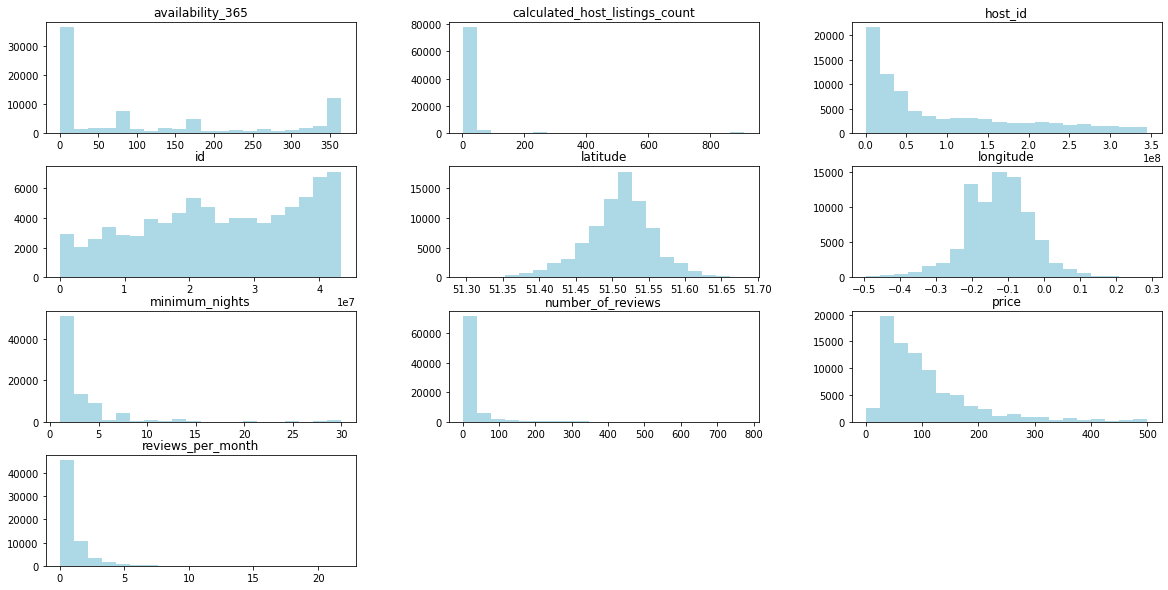

In [38]:
#remover os outliers montando um novo dataframe
# tamanho do dataframe original 85207 rows × 16 columns

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price>500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

#remover a variáver neighbourhood_group pois está vazia
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plortar o histograma para variáveis numéricas
df_clean.hist(bins=20, figsize=(20,10), color='lightblue', grid=False);

### **Q4. Qual a correlação existente entre as variáveis?**

No contexto desta análise vamos buscar a relação entre duas variáveis.

Essa relação pode ser medida e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis vou fazer as seguintes ações:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir da matriz, usando a biblioteca `seaborn`

In [39]:
# criar a matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
  
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.035273,-0.092356,-0.079346,0.288788,0.130018
minimum_nights,0.035273,1.000000,-0.087151,-0.143867,0.019085,0.020031
number_of_reviews,-0.092356,-0.087151,1.000000,0.722089,-0.051475,0.117523
reviews_per_month,-0.079346,-0.143867,0.722089,1.000000,-0.041187,0.132768
calculated_host_listings_count,0.288788,0.019085,-0.051475,-0.041187,1.000000,0.018379
availability_365,0.130018,0.020031,0.117523,0.132768,0.018379,1.000000


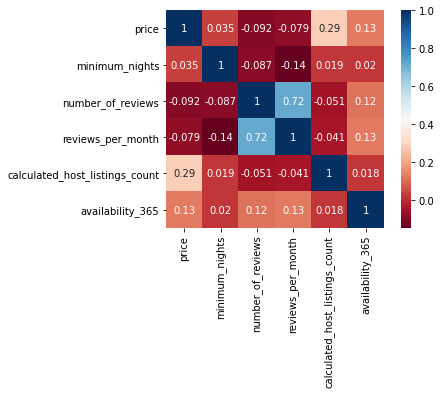

In [40]:
sns.heatmap(corr, cmap='RdBu', square=True, annot=True);

### **Q5. Quais os tipos de imóveis mais alugados no Airbnb?**

A variável `room_type` indica o tipo de locação que está anunciada. 
Se você já utilizou os serviços da plataforma, sabe que existem opções para locação de um imóvel inteiro, um quarto individual ou mesmo um quarto compartilhado.

Vamos calcular as ocorrências de cada tipo de aluguel, utilizando o método `value_counts()`.

In [41]:
# Calcular a quantidade de cada tipo de locação disponível
df_clean.room_type.value_counts()

Entire home/apt    45492
Private room       35368
Hotel room           676
Shared room          622
Name: room_type, dtype: int64

In [42]:
# mostrar o percentual que daca tipo de imóvel representa
(df_clean.room_type.value_counts()/df_clean.shape[0])*100

Entire home/apt    55.371358
Private room       43.048760
Hotel room          0.822805
Shared room         0.757078
Name: room_type, dtype: float64

### **Q6. Qual o bairro mais caro de Londres para locação no Airbnb?**

Uma forma para verificar uma variável em função da outra é usando a função `groupby()`. No caso, queremos comparar os bairros a partir do preço de locação. 


In [43]:
#mostrar os TOP 10 bairros mais caros para locação
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
City of London            167.802966
Kensington and Chelsea    161.582149
Westminster               157.497316
Camden                    126.736517
Hammersmith and Fulham    112.566785
Richmond upon Thames      111.490987
Wandsworth                106.841989
Islington                 105.158254
Southwark                  96.840118
Merton                     96.028331
Name: price, dtype: float64

In [44]:
#mostrar os TOP 10 bairros com mair volume de imóveis anunciados
df_clean.neighbourhood.value_counts()[:10]

Westminster               8942
Tower Hamlets             7908
Hackney                   6054
Camden                    5822
Kensington and Chelsea    5557
Islington                 4834
Southwark                 4741
Lambeth                   4715
Wandsworth                4082
Hammersmith and Fulham    3938
Name: neighbourhood, dtype: int64

Sem conhecer a cidade de Londres a fundo, podemos identificar que o Bairro *City of London* possui um número de imóveis disponíveis muito menor do que Bairros como *Kensington and Chelsea* e *Westminster*

Para identificar se os valores mostrados acima estão coerente com a realidade do bairro, podemos visualizar no detalhe os dados dos imóveis disponíveis para locação em cada bairro.

In [45]:
#detalhamento do bairro City of London
print(df_clean[df_clean.neighbourhood == 'City of London'].shape)

#ver os imóveis disponíveis
df_clean[df_clean.neighbourhood == 'City of London'][:10]

(472, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
149,137581,I Bedroom Apartment Tower of London,471088,Anthony,City of London,51.51173,-0.07659,Entire home/apt,130,2,213,2019-08-10,1.98,2,76
829,482178,Great St Paul's and City location,2176101,Andrew,City of London,51.51578,-0.09496,Entire home/apt,140,4,97,2020-01-22,1.02,1,302
1161,591549,"Smart City studio, lifts, wifi, exclusive use",2919661,Paul,City of London,51.51277,-0.07406,Entire home/apt,99,2,44,2020-03-18,1.17,2,268
1338,673067,"4 minute walk to Tower Bridge, 2 bedrooms, wifi.",2919661,Paul,City of London,51.51277,-0.07444,Entire home/apt,199,2,256,2020-02-23,2.75,2,239
1733,959041,"By The Wardrobe, St Pauls Cathedral",5005089,Simon And Sheba,City of London,51.51159,-0.10046,Entire home/apt,220,3,292,2020-01-12,3.36,1,334
2392,1558183,Tower of London - Tower Bridge,7732792,Angelica,City of London,51.51259,-0.07427,Entire home/apt,98,7,19,2020-02-07,0.24,3,294
2694,1876054,Authentic home in the City- London,995624,Mark,City of London,51.51982,-0.09900,Entire home/apt,185,1,103,2017-05-28,1.30,7,0
2703,1890820,"Self Isolate - Frontline - NHS - Safe, Secure ...",570672,Andy,City of London,51.51716,-0.07921,Entire home/apt,140,2,76,2019-10-13,0.97,14,321
2859,2026411,"CHARMING ONE BED NEAR BARTS, 50m FROM METRO",4649563,Sm,City of London,51.52017,-0.09725,Entire home/apt,151,7,24,2020-02-28,0.31,12,360
3183,2416056,"2-bed penthouse, views on the City",10673524,Milena,City of London,51.51971,-0.09216,Entire home/apt,185,3,228,2019-08-24,3.05,2,199


Uma vez que temos disponível no *dataset* a latitude e longitude de cada imóvel, é possível plotar cada ponto dentro de um gráfico e para isso, consideraremos `x=longitude` e `y=latitude`.

Como temos o preço de cada imóvel é possível utilizar esse dado para compor o gráfico, sendo possível criar uma escala de cores que destaca os imóveis e regiões com maiores preços.

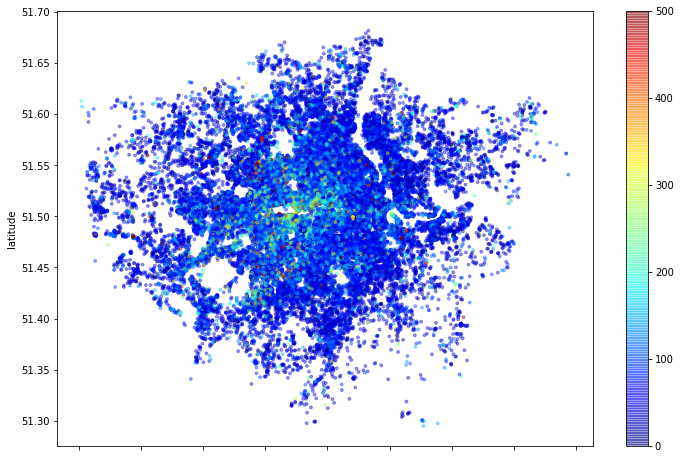

In [46]:
#grafico com latitude e longitude destacados por preço mais alto
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

#### **Mapa de Londres**

<img alt="Mapa de Londres" src="https://pt.londonmap360.com/carte/image/pt/mapa-distritos-londres.png" width="641" height="513">


## Conclusões

Foi realizada uma análise a partir dados disponibilizados pelo Airbnb e foi possível identificar a existência de *outliers* em algumas variáveis.
Vale lembrar que esse *dataset* é uma versão resumida, que é ideal para uma análise inicial.

O gráfico plotado a partir da latitude, longitude e com destaque por preço, mostra que os preços mais altos se concetram na região central da cidade e nos bairros mais próximos.

Ainda no mesmo gráfico é possível identificar que existem muitos imóveis disponíveis em bairros um pouco mais afastados do centro e que possuem um preço médio mais baixo.

Vale lembrar que londres possui uma gama de opções de transporte público, com preço acessível e pontualidade britânica. Consulte o [Mapa do transporte público de Londres](https://www.mapsland.com/maps/europe/united-kingdom/london/large-detailed-public-transport-map-of-london-city.jpg)


Antes de se hospedar, consulte a avaliação dos usuários do Airbnb que é uma referência bastente confiável, procure locias com facilidade de acesso ao trasporte público e se prepare para uma experiência única de vivenciar as maravilhas de Londres.

